In [169]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import acf, pacf
from sklearn.metrics import mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import sklearn
import scipy
import warnings
warnings.filterwarnings("ignore")

In [170]:
df = pd.read_csv('train.csv')

In [171]:
df.drop(['building_id'],axis = 1, inplace=True)

In [172]:
data = df[df['meter_reading'] != 0.0 ]

In [173]:
data['meter'].value_counts()

0    11530741
1     3525936
2     2361753
3      923694
Name: meter, dtype: int64

In [174]:
data = data[data['meter'] == 0]
weather_data = pd.read_csv('weather_train.csv')
data['timestamp'] = pd.to_datetime(data['timestamp'])
dataset = data.set_index('timestamp').groupby(pd.Grouper(freq='H')).sum()
dataset.drop(['meter'],axis=1, inplace=True)

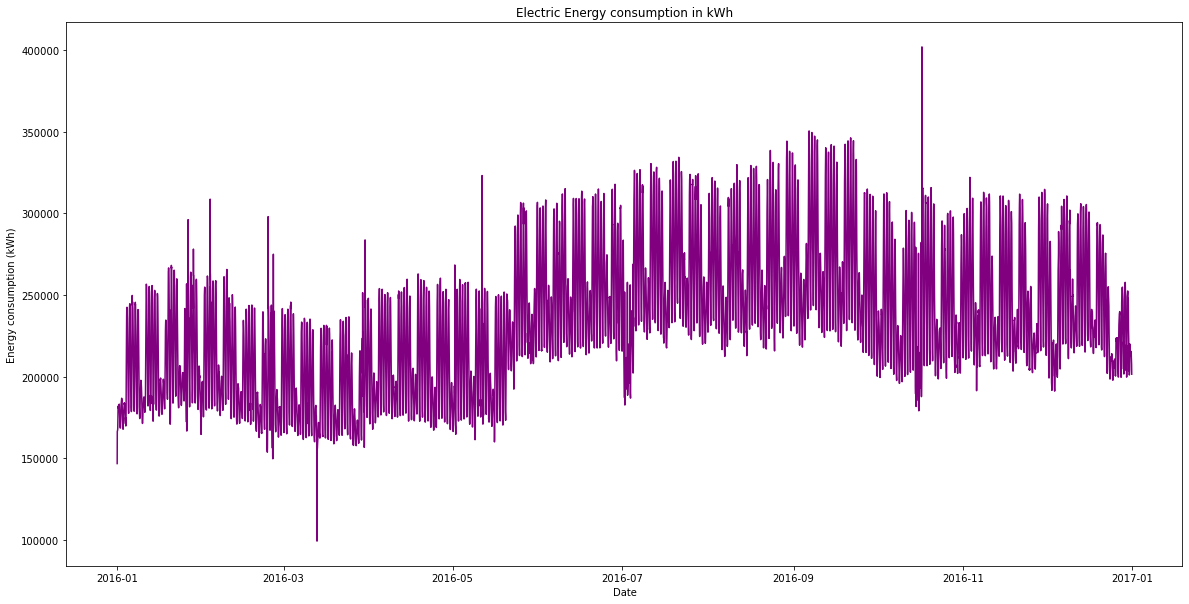

In [180]:
plt.figure(figsize=(20,10))
plt.plot(dataset,color='purple')
plt.title('Electric Energy consumption in kWh')
plt.ylabel('Energy consumption (kWh)')
plt.xlabel('Date')
plt.show()

In [182]:
weather_data = weather_data.drop('site_id',axis=1)
weather_data['timestamp'] = pd.to_datetime(weather_data['timestamp'])
weather = weather_data.set_index('timestamp').groupby(pd.Grouper(freq='H')).mean()
df = pd.merge(dataset,weather,on='timestamp')
df.drop(['wind_direction','dew_temperature','precip_depth_1_hr'],axis=1,inplace=True)

In [185]:
df.head()

,meter_reading,air_temperature,cloud_coverage,sea_level_pressure,wind_speed
timestamp,,,,,
2016-01-01 00:00:00,146796.9708,7.711111,6.333333,1018.688889,2.544444
2016-01-01 01:00:00,166439.5826,5.881250,0.571429,1021.128571,2.531250
2016-01-01 02:00:00,166652.5184,5.168750,1.555556,1021.300000,1.700000
2016-01-01 03:00:00,166988.5308,4.900000,1.777778,1021.292857,2.525000
2016-01-01 04:00:00,167381.4970,4.720000,1.500000,1021.371429,2.640000


In [186]:
from statsmodels.tsa.stattools import adfuller
# check_adfuller

# Dickey-Fuller test
result = adfuller(df['meter_reading'], autolag='AIC')
print('Test statistic: ' , result[0])
print('p-value: '  ,result[1])
print('Critical Values:' ,result[4])

Test statistic:  -6.586295062431938
p-value:  7.3005224791538826e-09
Critical Values: {'1%': -3.43109790993778, '5%': -2.861870526484161, '10%': -2.566945934275714}


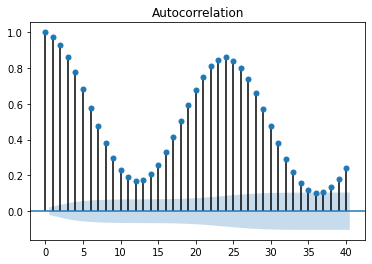

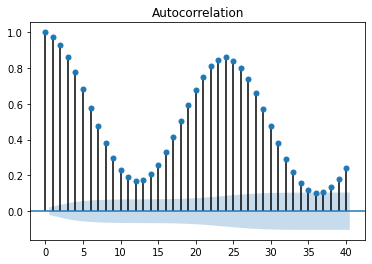

In [187]:
plot_acf(df.meter_reading,lags=None)

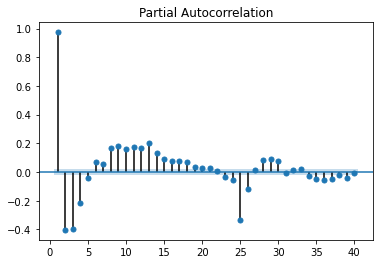

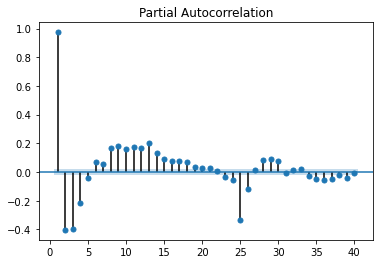

In [188]:
plot_pacf(df.meter_reading,lags=None,zero=False)

In [189]:
df['Month'] = df.index.month

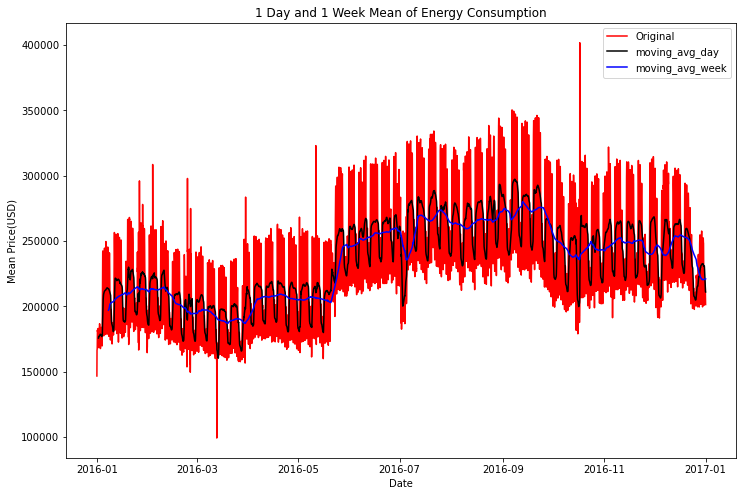

In [205]:
ws = 24
m_avg_day = df['meter_reading'].rolling(ws).mean()
m_avg_week = df['meter_reading'].rolling(ws*7).mean()
plt.figure(figsize=(12,8))
plt.plot(df['meter_reading'], color = "red",label = "Original")
plt.plot(m_avg_day, color='black', label = "moving_avg_day")
plt.plot(m_avg_week, color='blue', label = "moving_avg_week")
plt.title("1 Day and 1 Week Mean of Energy Consumption")
plt.xlabel("Date")
plt.ylabel("Mean Price(USD)")
plt.legend()
plt.show()

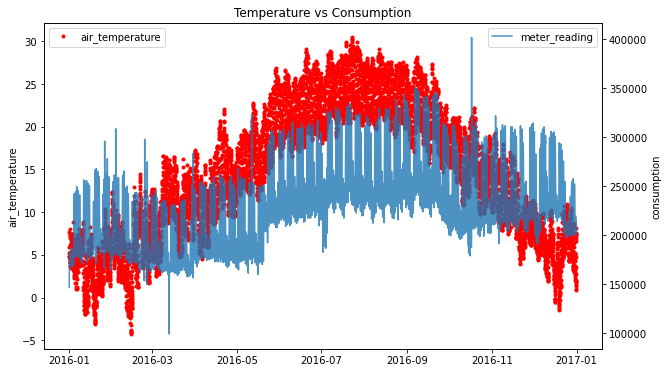

In [206]:
fig, ax = plt.subplots(figsize=(10,6))
plt.title(f'Temperature vs Consumption')
ax2 = ax.twinx()
ax2.plot(df.index, df.meter_reading, '-', label='meter_reading', alpha=0.8)
ax.plot(df.index,df.air_temperature, '.', color='red', label='air_temperature')
ax.set_ylabel('air_temperature') 
ax2.set_ylabel('consumption')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

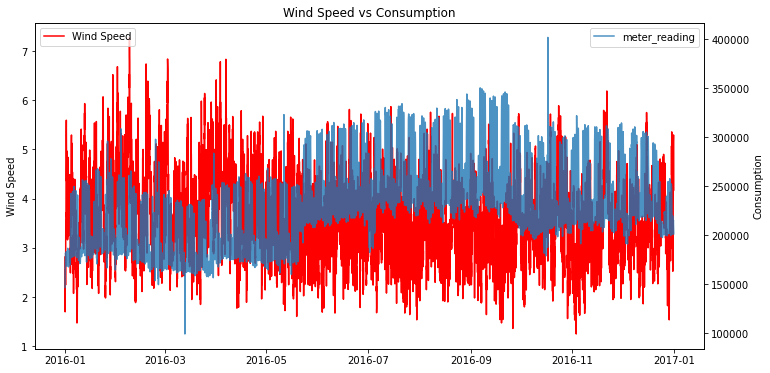

In [207]:

fig, ax = plt.subplots(figsize=(12,6))
plt.title(f'Wind Speed vs Consumption')
ax2 = ax.twinx()
ax2.plot(df.index, df.meter_reading, '-', label='meter_reading', alpha=0.8)
ax.plot(df.index,df.wind_speed, color='red', label='Wind Speed')
ax.set_ylabel('Wind Speed') 
ax2.set_ylabel('Consumption')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

In [191]:
df['weekday'] = df.index.dayofweek
df['Day'] = df.index.day
df['hour'] = df.index.hour

Text(0, 0.5, 'Total Consumption')

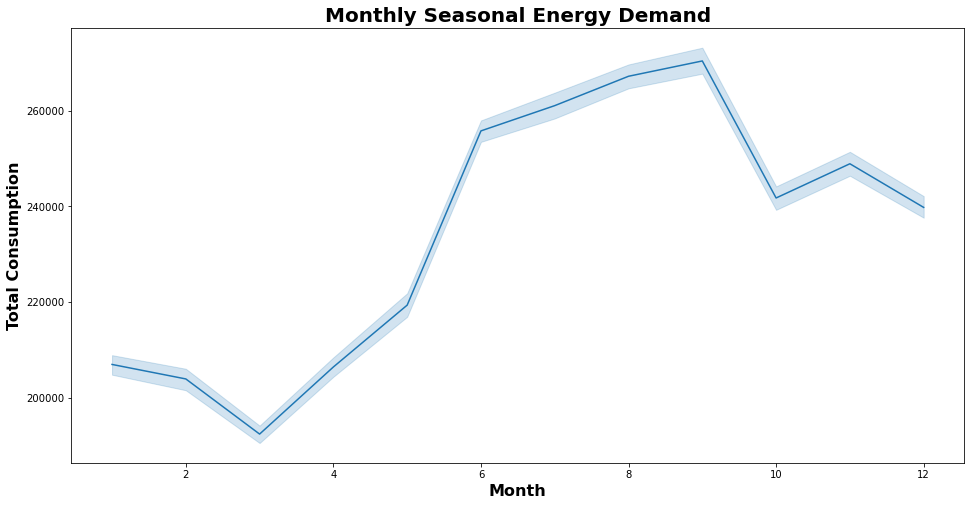

In [192]:
fig, ax = plt.subplots(figsize=(16, 8))
palette = sns.color_palette("flare", 12)
sns.lineplot(df['Month'], df['meter_reading'])
ax.set_title('Monthly Seasonal Energy Demand', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Total Consumption', fontsize = 16, fontdict=dict(weight='bold'))

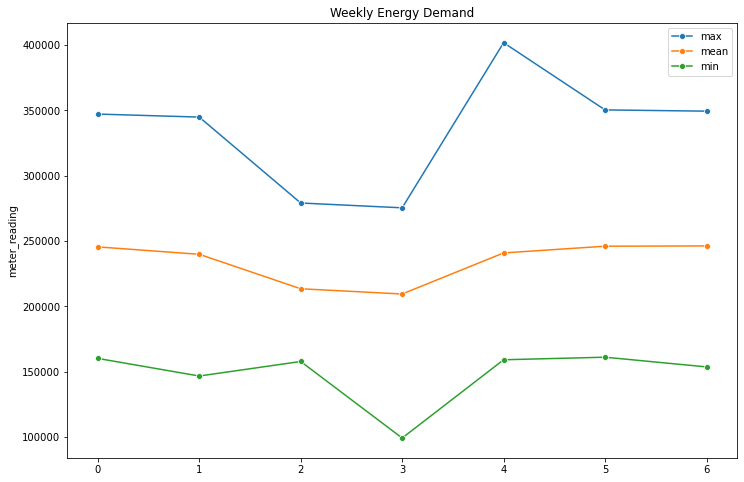

In [195]:
plt.figure(figsize=(12,8))
x1 = df['weekday'].unique()
y1 = df.groupby('weekday')['meter_reading'].max()
sns.lineplot(x1, y1, label =  'max',marker='o')
y2 = df.groupby('weekday')['meter_reading'].mean()
sns.lineplot(x1, y2, label = "mean",marker='o')
y3 = df.groupby('weekday')['meter_reading'].min()
sns.lineplot(x1, y3, label = "min",marker='o')
plt.title('Weekly Energy Demand')
plt.legend()
plt.show()

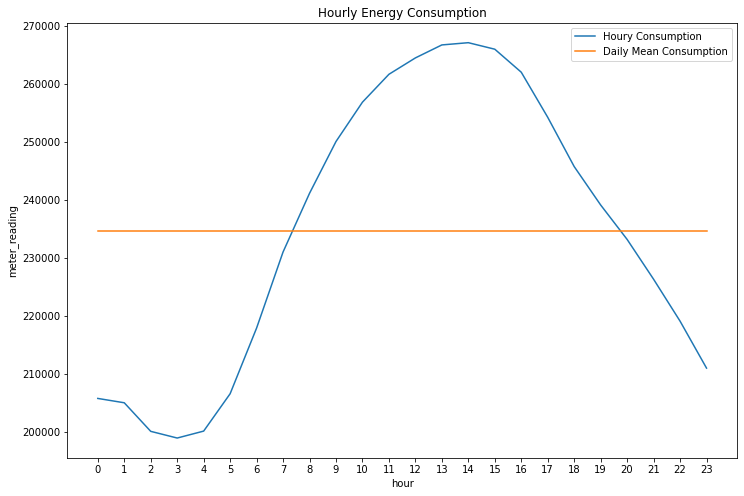

In [196]:
xs = df['hour'].unique()
plt.figure(figsize=(12,8))
grouped = df.groupby('hour')['meter_reading'].mean().reset_index()
sns.lineplot(x = 'hour', y = 'meter_reading',data = grouped ,label = "Houry Consumption").set_title('Hourly Energy Consumption')
sns.lineplot(grouped['hour'],np.mean(grouped['meter_reading']),label = "Daily Mean Consumption")
plt.xticks(xs)
plt.show()

In [197]:
df['is_weekend'] = 'Weekday'
df.loc[df['weekday'].isin([5, 6]), 'is_weekend'] = 'Weekend'

Text(0.5, 1.0, 'Weekday Box Plot')

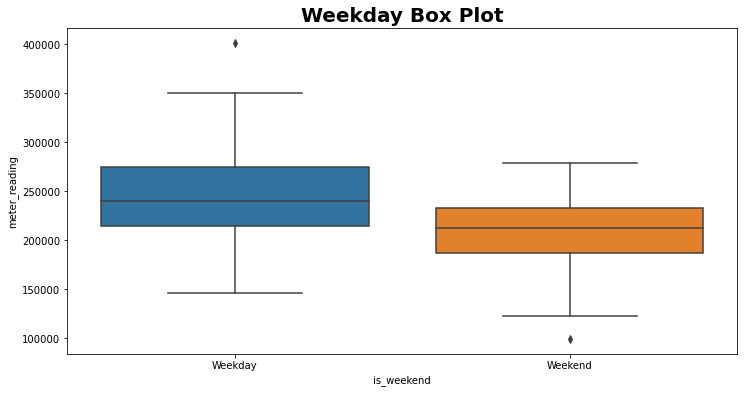

In [198]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data = df,x='is_weekend',y = 'meter_reading')
ax.set_title('Weekday Box Plot', fontsize = 20, loc='center', fontdict=dict(weight='bold'))